In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_csv('data/disney.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [11]:
# rate of missing values in each column
np.round(df.isna().sum()/len(df),3)

show_id         0.000
type            0.000
title           0.000
director        0.326
cast            0.131
country         0.151
date_added      0.002
release_year    0.000
rating          0.002
duration        0.000
listed_in       0.000
description     0.000
dtype: float64

In [17]:
# deal with missing values in different ways: fillna(), replace(), dropna()
df.fillna({'director':'noData'},inplace=True)
df['cast'] = df['cast'].replace(np.nan, 'noData')
df['country'] = df['country'].replace(np.nan, 'noData')
df.dropna(axis=0, inplace=True)
np.round(df.isna().sum()/len(df),3)

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [23]:
# extract month from data_added
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
df['month_added'] = df['date_added'].dt.month
df['month_added'][:5]

0    11
1    11
2    11
3    11
5    11
Name: month_added, dtype: int32

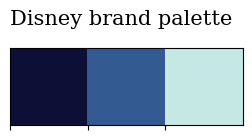

In [28]:
disney = sns.palplot(['#0E0F37','#335B92','#C6E8E5'])
plt.title("Disney brand palette ", loc='left', fontfamily='serif', fontsize=15, y=1.2)
plt.show()

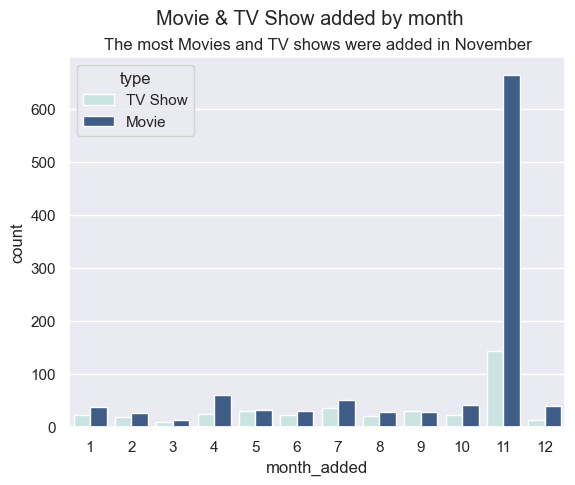

In [44]:
sns.countplot(data=df,x='month_added',hue='type',palette=['#C6E8E5','#335B92'])
plt.suptitle('Movie & TV Show added by month')
plt.title('The most Movies and TV shows were added in November')
plt.show()

In [46]:
!pip install wordcloud

In [47]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image

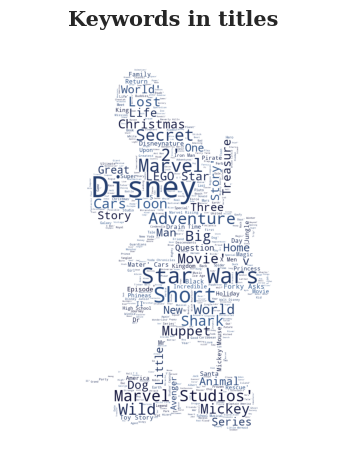

In [51]:
plt.figure(figsize=(5, 5))

text = str(list(df['title']))
mask = np.array(Image.open('data/disney.jpg'))
cmap = plt.matplotlib.colors.LinearSegmentedColormap.from_list("", ['#0E0F37', '#335B92'])

wordcloud = WordCloud(background_color = 'white', width = 1000,  height = 1000, max_words = 500, mask = mask, colormap=cmap).generate(text)

plt.suptitle('Keywords in titles', fontweight='bold', fontfamily='serif', fontsize=15)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()